In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
!pip install keras-tuner
from kerastuner.tuners import RandomSearch

     |████████████████████████████████| 61kB 4.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=5bcfe8e4bbeb2ce0083e6b18a826a03cdc6974486151ae35f84a34c05b7a7ee4
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=180a3cc5612412fed49b3ffc950b07e8c0eeed9083bd76349a45470a422743bf
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [4]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
data.shape

(17000, 9)

In [7]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def build_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(128,activation="relu",input_shape=(8,),kernel_initializer="normal"))
  model.add(tf.keras.layers.Dense(64,activation="relu",kernel_initializer="normal"))
  model.add(tf.keras.layers.Dense(32,activation="relu",kernel_initializer="normal"))
  model.add(tf.keras.layers.Dense(1,kernel_initializer="normal"))
  model.compile(loss="mse",optimizer="adam")
  return model

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
model = KerasRegressor(build_fn=build_model,epochs=100,batch_size=64,verbose=1)

In [ ]:
model_history = model.fit(X,y,validation_split=0.2)

Epoch 1/100
213/213 [==============================] - 1s 3ms/step - loss: 50632511488.0000 - val_loss: 75352129536.0000
Epoch 2/100
213/213 [==============================] - 0s 2ms/step - loss: 30554114048.0000 - val_loss: 56300376064.0000
Epoch 3/100
213/213 [==============================] - 0s 2ms/step - loss: 13402245120.0000 - val_loss: 44127698944.0000
Epoch 4/100
213/213 [==============================] - 1s 2ms/step - loss: 11414702080.0000 - val_loss: 34494496768.0000
Epoch 5/100
213/213 [==============================] - 0s 2ms/step - loss: 9715450880.0000 - val_loss: 25200234496.0000
Epoch 6/100
213/213 [==============================] - 1s 2ms/step - loss: 8011071488.0000 - val_loss: 17018201088.0000
Epoch 7/100
213/213 [==============================] - 0s 2ms/step - loss: 6480339456.0000 - val_loss: 10929724416.0000
Epoch 8/100
213/213 [==============================] - 1s 2ms/step - loss: 5446823936.0000 - val_loss: 7994913280.0000
Epoch 9/100
213/213 [================

In [ ]:
# estimators = []
# estimators.append(("standardize",StandardScaler()))
# estimators.append(("mlp",KerasRegressor(build_fn=build_model,epochs=100,batch_size=64,verbose=1)))
# pipe = Pipeline(estimators)

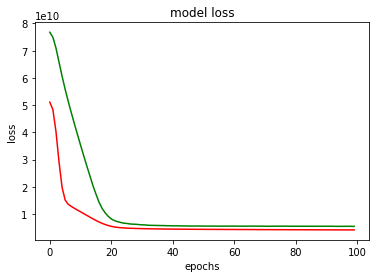

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(model_history.history["loss"],color="r")
plt.plot(model_history.history["val_loss"],color="g")
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
kfold = KFold(n_splits=10,random_state=42)
results = cross_val_score(pipe,X,y,cv=kfold)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Epoch 1/100
240/240 [==============================] - 0s 2ms/step - loss: 57555152896.0000
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 28231198720.0000
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 10947989504.0000
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 8938368000.0000
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 7848636928.0000
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 7101530624.0000
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 6525839360.0000
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 6060248064.0000
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 5682669056.0000
Epoch 10/100
240/240 [==============================] - 0s 2ms/step - loss: 5365943808.0000
Epoch 11/100
240/240 [==============================] - 0s 2ms/step - loss: 5116666368

In [ ]:
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -51772555264.00 (7834918329.60) MSE


In [ ]:
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -6074528426.67 (846366591.45) MSE
